In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram

from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

# Wine Data Set

This dataset contains results of a chemical analysis of wines grown in the same region in Italy but derived from three different types of grapes. This dataset contains 13 features about the three types of wine.

> https://archive.ics.uci.edu/ml/datasets/wine


In [2]:
col_names = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
             'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
             'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline']

df = pd.read_csv("wine.data", names=col_names)
df.head()

Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
1    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
1    13.16        2.36  2.67               18.6        101           2.80   
1    14.37        1.95  2.50               16.8        113           3.85   
1    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
1        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
1        3.49                  0.24             2.18             7.80  0.86   
1        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
1   3.92     1065  
1   3.40     1050  
1   3.17     1185  
1   3.45     1480  
1   2.93      735

## Clustering

Clustering is unsupervized learning technique which take dataset and find groups of similar records.

In [3]:
print(df.info())

print('\n|------------------------|\n')

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity_of_ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB
None

|------------------------|

Alcohol                 0
Malic_acid          

### Comment 
Our data don't contains any null values.

In [4]:
standard_scalar = StandardScaler()
df_scaled = standard_scalar.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
df.head()

Alcohol  Malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color_intensity       Hue     OD280   Proline  
0         0.251717  0.362177  1.847920  1.013009  
1        -0.293321  0.406051  1.113449  0.965242  
2         0.269020  0.318304  0.788587  1.395148  
3         1.186068 -0.427544  1.184071  2.334574  
4        -0.319276  0.362177  0.449601 -0.037874

### Comment 
Here I standarized the data because I will be using the K-means algorithm which is using the distance as the main metric for grouping the data so I need to be carefull about scale.

## Principal Component Analysis (PCA)

This is technique for analyzing large datasets containing a high number of features per observation, enabling the visualization of multidimensional data. Formally, PCA is statistical technique for reducing the dimensionality of a dataset. 

This is done by linearly transforming the data into a new coordinate system where the variation in the data can be described with fewer dimensions than the initial data. 

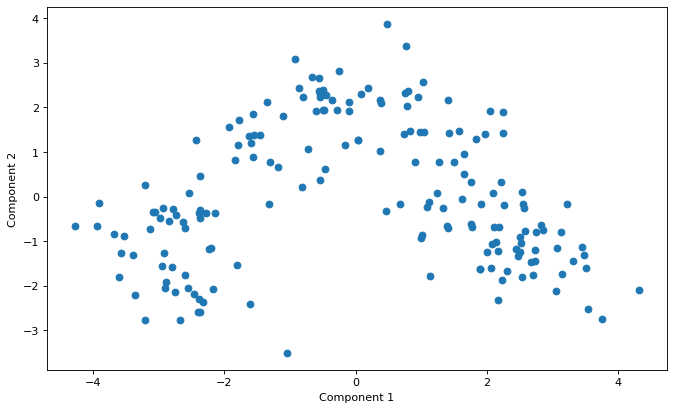

In [5]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.values)

plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(pca_data[:, 0], pca_data[:, 1])

### Comment
Here I transformed our data into 2 principal componsnets model. Then I used this to plot the data in two dimensions and to visually identify clusters of closely related data points. We can see this three groups (right bottom, left bottom, top).

## K-means clustering

K-means clustering is an unsupervised machine learning algorithm that is used to divide a group of data points into K clusters, where K is known on start number. 

It does this by iteratively assigning each data point to the cluster whose mean (center) is closest, and then re-computing the means of each cluster. The algorithm continues until the means of the clusters do not change significantly.

In [6]:
k_means = KMeans(init="random", n_clusters=5, random_state=22)
clusters = k_means.fit_predict(df)

### Comment
Firstly I created the KMeans model using the five clusters and with random choosing of the initial coordinations for each cluster. Then I fitted and predicted the clusters for my data and as a result I got the list with cluster to which the wine belongs. 

In [7]:
centers = k_means.cluster_centers_
print(centers)
pca_centers = pca.transform(centers)

[[-1.0027005  -0.16802607  0.40568123  0.80895127 -0.52210763 -0.08608281
   0.19455459  0.37676028  0.18044717 -0.91610195  0.3670521   0.3577924
  -0.82090563]
 [-0.17099832  0.6162136  -0.10378191  0.17230538 -0.153      -1.07324145
  -1.22316495  0.82609488 -1.18477922  0.08815131 -0.75851356 -1.17470806
  -0.45364947]
 [ 0.90537676 -0.29781954  0.29338792 -0.69473572  0.55724067  0.89427402
   0.95416129 -0.60903111  0.59829118  0.19364983  0.47074532  0.77709639
   1.1783867 ]
 [ 0.48528654  0.96572899  0.49746208  0.83709393  0.12804416 -0.80239081
  -1.14073328  0.64720283 -0.3184736   1.81291834 -1.46905975 -1.38534627
  -0.29747947]
 [-0.8217734  -0.65393968 -1.42982209 -0.4607061  -0.43322645  0.11198317
   0.07423794 -0.67682984  0.12294822 -0.82012977  0.60974853  0.38301459
  -0.66476435]]


### Comment
As I write before the algorithm assign data points to clusers whose center is closest. So I retrieve the final coordinates of center of each cluster.
Also I mapped this coordinates to the PCA to be abble to show this on the plot.

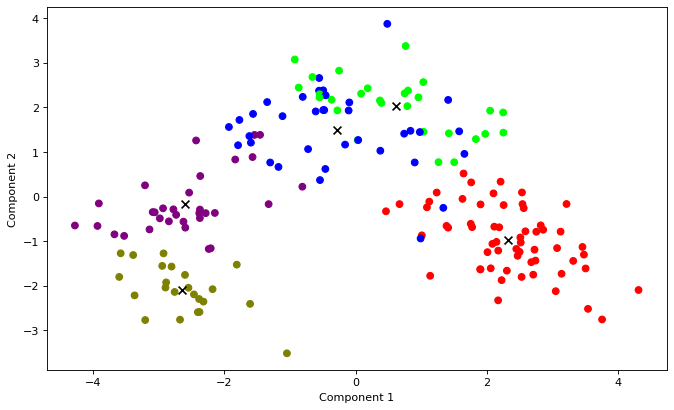

In [8]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="brg")
plt.scatter(pca_centers[:, 0], pca_centers[:,1], marker="x", s=50, color="black")

### Comment
As we can see the model divided our data to the number of specified groups (five). Red, purple or yellow clusters looks good but we have some problems with the borders (also we need to remember that this is only PCA and we can not see every dependencies in dimensions correctly). 

## Determining the number of clusters.

In this model we need to exactly specify how many clusters we are looking for. The number of clusters is very difficult to guess intuitively (unless we know our data, as in our case we know there are three types of wine).

We can use **Elbow Method** to determination the number of clusters in a data set. This work by plotting how good our model is for each number of clusters. The measurement of this we can do by the inertia parameter in our model which is sum of squared distances of samples to their closest cluster center.

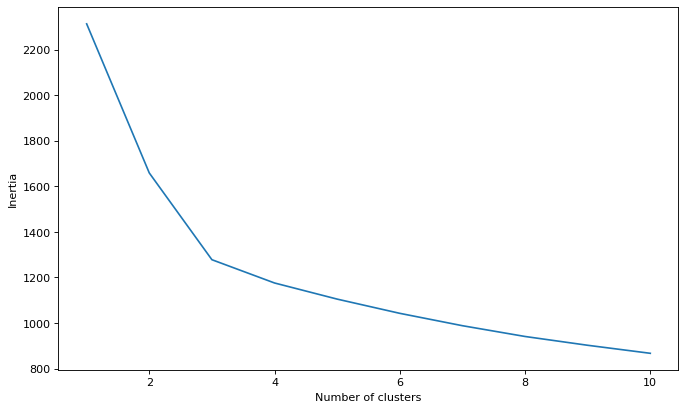

In [9]:
quality = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    quality.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.plot(range(1, 11), quality)

### Comment
Looking at the graph above, we are able to see where the name of the method comes from. Our curve resembles an elbow, and the optimal number of clusters we should choose is the location of the bend. In our case, we see that it is 3.

We can also see that the more clusters, the better the results (tending to 0). This is because if we have N data and create N clusters, then one value will enter each cluster and the distance to it will be 0 (to itself).

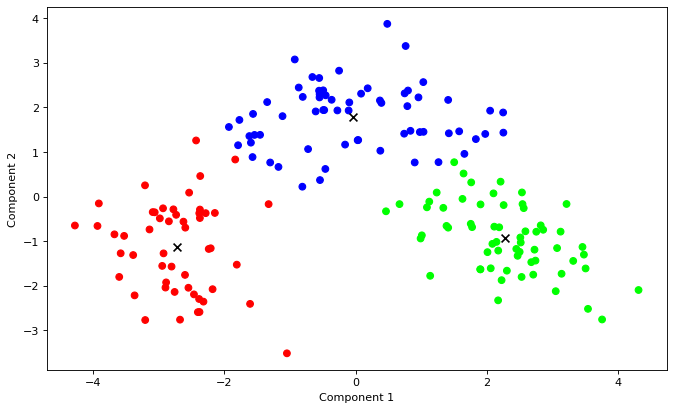

In [10]:
k_means = KMeans(init="random", n_clusters=3, random_state=22)
clusters = k_means.fit_predict(df)

centers = k_means.cluster_centers_
pca_centers = pca.transform(centers)

plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="brg")
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], marker="x", s=50, color="black")

### Comment 
When we use three clusters, we see wines grouped into three types and this visual grouping makes the most sense to us (but everything always depends on what we want to achieve or what our guidelines are).

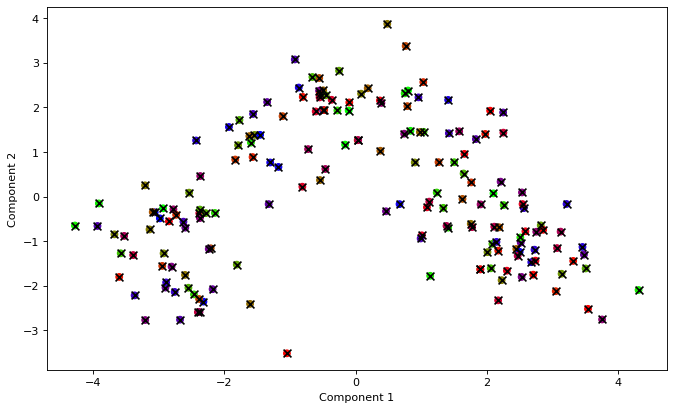

In [11]:
k_means = KMeans(init="random", n_clusters=len(df.index), random_state=22)
clusters = k_means.fit_predict(df)

centers = k_means.cluster_centers_
pca_centers = pca.transform(centers)

plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="brg")
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], marker="x", s=50, color="black")

### Comment 
Above, I presented a division into clusters with the number corresponding to the number of measured wines. As I mentioned, each point gets its cluster and it is also the center of this cluster.

## k-means++

Before we were using randomization to choose the initial centers of clusters. Now we will be selecting initial cluster centers using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up grouping our data.

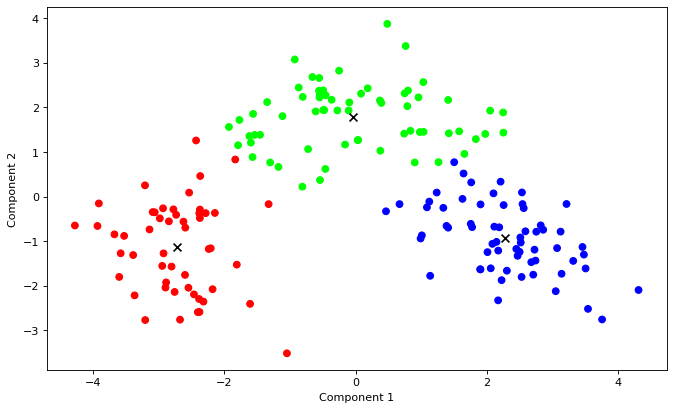

In [12]:
k_means = KMeans(init="k-means++", n_clusters=3, random_state=22)
clusters = k_means.fit_predict(df)

centers = k_means.cluster_centers_
pca_centers = pca.transform(centers)

plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="brg")
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], marker="x", s=50, color="black")

### Comment
As we can see, nothing changed in our result when we started using the selected starting point (the only change in the colors on the graph, but it doesn't matter).

In [13]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df)

fig = px.scatter_3d(
    pca_data, x=0, y=1, z=2, 
    color=clusters, 
    size=np.ones(len(df)), 
    opacity = 1,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=700, height=500
)

fig.show()

### Comment 
Above we can see a representation of wine types scaled to 3D. Again, intuitively, this is a good division.

## Hierarchical clustering

Hierarchical clustering is a method that build a hierarchy of clusters. It group objects in clusters based on how similar they are to each other.


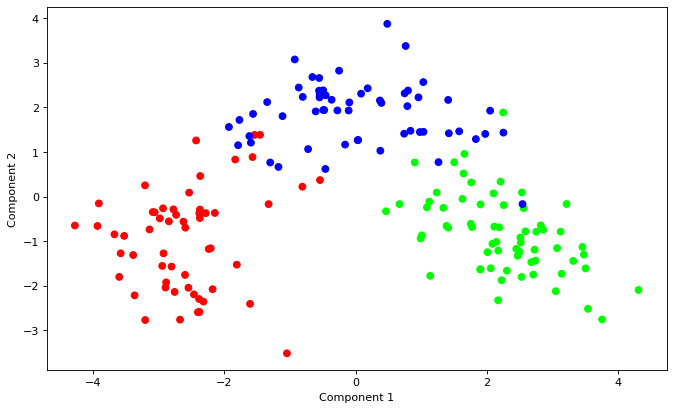

In [14]:
hier = AgglomerativeClustering(n_clusters=3)
clusters = hier.fit_predict(df)

plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="brg")

### Comment
Above we can observe the PCA plot with the clustering using the hierarchical clustering. The agglomerative clustering starts with an individual element and then groups them into single clusters. We can see that in this view of PCA the wines clusters looks a bit mixed.

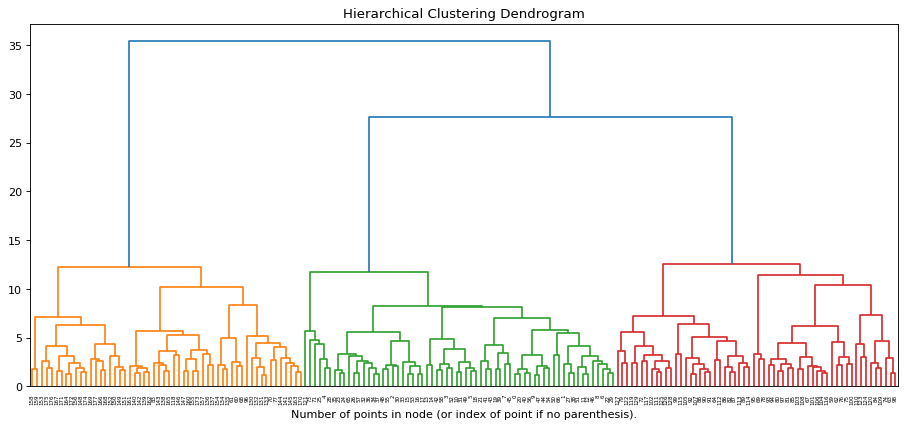

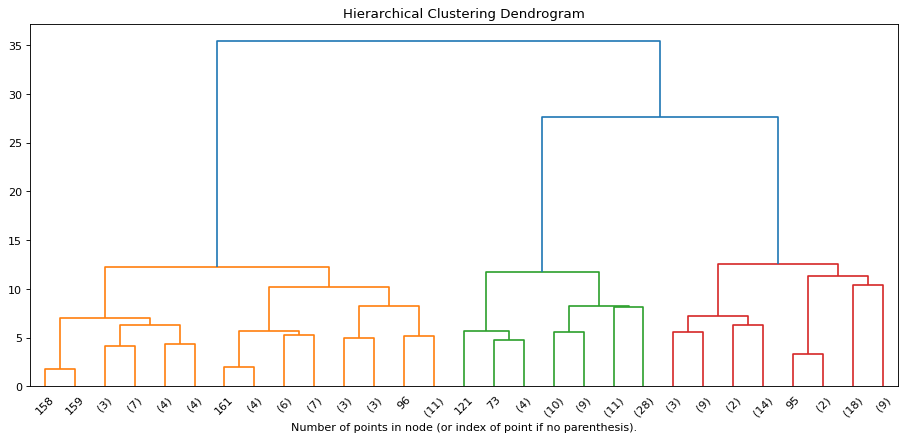

In [15]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=3, compute_distances=True)
model = model.fit(df)

plt.figure(figsize=(14, 6), dpi=80)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

plt.figure(figsize=(14, 6), dpi=80)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Comment
Code to draw the dendograms is adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html.

A dendrogram is a diagram that shows the hierarchical relationship between objects. On the first we can observe how clustering was working step by step to group our data info three clusters. And on the second we can observe the last steps. The numbers below tell us if the branch is node or leaf. The nodes have numbers in parenthesis.

## Comparing methods

The most important limitations of K-Means are that user has to specify number of clusters in the beginning and this model can only handle numerical data. The problem is also that this model assumes that we deal with spherical clusters, so we have problems with more complex boundaries.

The most important limitations of hierarchical clustering are that it isn't suitable for large datasets due to high time and space complexity and all the ways to calculate the similarity between clusters has their own disadvantages that can make our classification very bad.

Text(0.5, 1.0, 'Hierarchial')

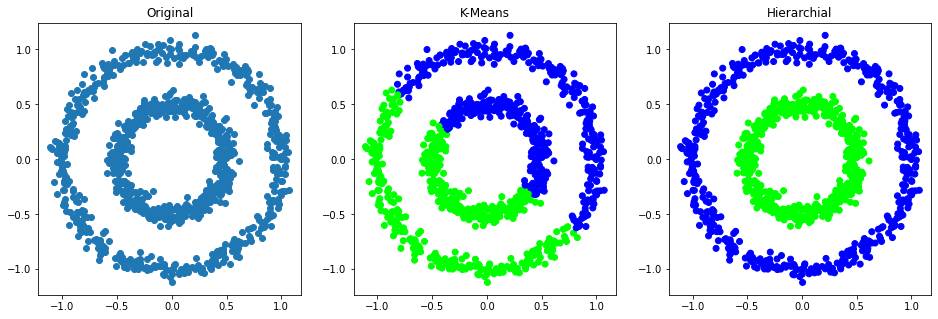

In [16]:
n_samples = 1000
circles, _ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

k_means = KMeans(init="k-means++", n_clusters=2, random_state=22)
k_clusters = k_means.fit_predict(circles)

hier = AgglomerativeClustering(linkage="single")
hier_clusters = hier.fit_predict(circles)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes[0].scatter(circles[:, 0], circles[:, 1], cmap="brg")
axes[0].set_title("Original")
axes[1].scatter(circles[:, 0], circles[:, 1], cmap="brg", c=k_clusters)
axes[1].set_title("K-Means")
axes[2].scatter(circles[:, 0], circles[:, 1], cmap="brg", c=hier_clusters)
axes[2].set_title("Hierarchial")

### Comment
I found similar data to charts presnted on the lectures and applied the clusterization on its. Looking to the original data we can expect that we will get two clusters. One cluster per ring. But using k-means we got our data divided by secant due to the limitations that it can separate only linear cluster boundaries. The best result we have using hierarchical when single linkage minimizes the distance between the closest observations of pairs of clusters.

Text(0.5, 1.0, 'Hierarchial')

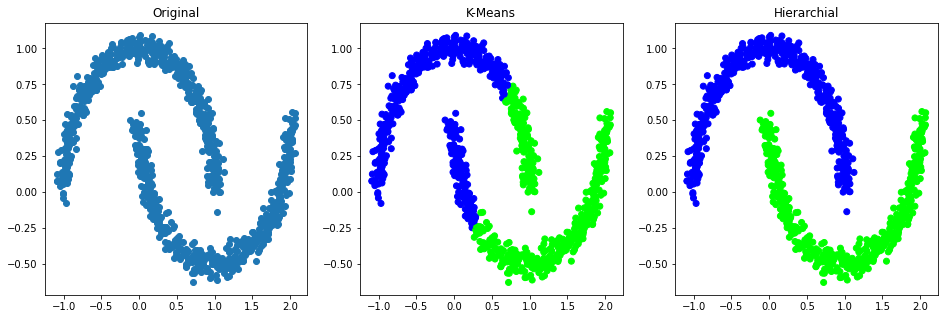

In [17]:
moons, _ = datasets.make_moons(n_samples=n_samples, noise=0.05)

k_means = KMeans(init="k-means++", n_clusters=2, random_state=22)
k_clusters = k_means.fit_predict(moons)

hier = AgglomerativeClustering(linkage="single")
hier_clusters = hier.fit_predict(moons)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes[0].scatter(moons[:, 0], moons[:, 1], cmap="brg")
axes[0].set_title("Original")
axes[1].scatter(moons[:, 0], moons[:, 1], cmap="brg", c=k_clusters)
axes[1].set_title("K-Means")
axes[2].scatter(moons[:, 0], moons[:, 1], cmap="brg", c=hier_clusters)
axes[2].set_title("Hierarchial")

Text(0.5, 1.0, 'Hierarchial')

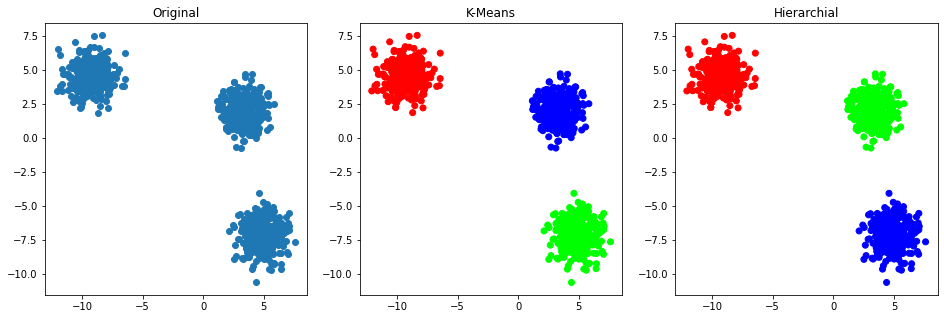

In [18]:
bloobs, _ = datasets.make_blobs(n_samples=n_samples,)

k_means = KMeans(init="k-means++", n_clusters=3, random_state=22)
k_clusters = k_means.fit_predict(bloobs)

hier = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=50)
hier_clusters = hier.fit_predict(bloobs)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes[0].scatter(bloobs[:, 0], bloobs[:, 1], cmap="brg")
axes[0].set_title("Original")
axes[1].scatter(bloobs[:, 0], bloobs[:, 1], cmap="brg", c=k_clusters)
axes[1].set_title("K-Means")
axes[2].scatter(bloobs[:, 0], bloobs[:, 1], cmap="brg", c=hier_clusters)
axes[2].set_title("Hierarchial")

### Comment 
On the moons again like in the circles. But in the blobs we can observe few things. First that is also visible in previous we always need to add number on clusters in the K-Means. And also we can do this to hierarchical (like in moon and circle, number of clusters was default 2). 

But what if we don't know how many clusters it will be? We can do this in hierarchical by adding linkage distance threshold above which clusters will not be merged.

Text(0.5, 1.0, 'Distance 1000')

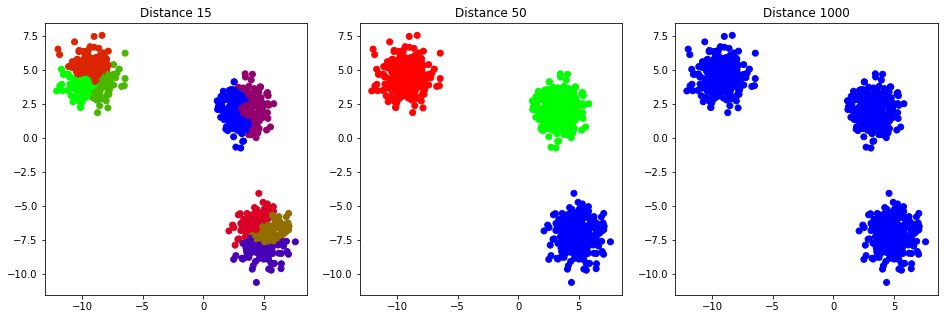

In [19]:
hier = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=15)
hier_15 = hier.fit_predict(bloobs)

hier = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=50)
hier_50 = hier.fit_predict(bloobs)

hier = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=1000)
hier_1000 = hier.fit_predict(bloobs)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes[0].scatter(bloobs[:, 0], bloobs[:, 1], cmap="brg", c=hier_15)
axes[0].set_title("Distance 15")
axes[1].scatter(bloobs[:, 0], bloobs[:, 1], cmap="brg", c=hier_50)
axes[1].set_title("Distance 50")
axes[2].scatter(bloobs[:, 0], bloobs[:, 1], cmap="brg", c=hier_1000)
axes[2].set_title("Distance 1000")

### Comment
Adding to small distance will give us more clusters but it can be useless like in example below. Also adding to big distane will make a small number of clusters, so that unrelated elements will be in the same clusters. We need to choose here optimaly.